# Function Transformation
### What is feature Transformation
Feature transformation is the mathametical transformation in which we apply the mathematical formula to perticular column and transform the values for further analysis. It is also known as **Feature engineering** i.e. creating new features from the existing ones.\
This technique can help to improve models performance.

### Why to apply feature transformations
- some machine learning algorithms like linear and logestic regression assume that the data to be in normal distribution.But in reality the dataset contains some kind of skew.
- By applying this transformations to these skewed variables, we can map this skewed variables to be normal distribution with the help of which we can improove the performance of the model

### Types of transformations present in sklearn
1. Function transformations
2. Power transformations
3. Quantile transformations

### Function transformations
<ol>
    <li>Log transformations
        <ul>
            <li>This transformation is not applied to those features which have negative values.</li>
            <li>This transformation is mostly applied to <b>right-skewed data</b>.</li>
            <li>Convert data from addictive Scale to multiplicative scale i,e, linearly distributed data.</li>
        </ul>
    </li>
    <li>Reciprocal transformations
        <ul>
            <li>This transformation is not defined for zero.</li>
            <li>It is a powerful transformation with a <b>radical effect</b>.</li>
            <li>This transformation reverses the order among values of the same sign, so large values become smaller and vice-versa.</li>
        </ul>
    </li>
    <li>Square transformations
        <ul>
            <li>This transformation mostly applies to <b>left-skewed data</b>.</li>
        </ul>
    </li>
    <li>Square root transformations
        <ul>
            <li>This transformation is defined only for <b>positive numbers</b>.</li>
            <li>This transformation is weaker than Log Transformation.</li>
            <li>This can be used for reducing the skewness of <b>right-skewed data</b>.</li>
        </ul>
    </li>
</ol>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [31]:
dataset = pd.read_csv("Datasets/titanic.csv", usecols=["Age","Fare","Survived"])

In [32]:
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
dataset.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [34]:
impute_age = SimpleImputer(strategy="median")

In [35]:
dataset.iloc[:,1] = impute_age.fit_transform(dataset.iloc[:,1].values.reshape(-1,1))

In [36]:
dataset.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [41]:
X = dataset.iloc[:,1:3]
Y = dataset.iloc[:,0]

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

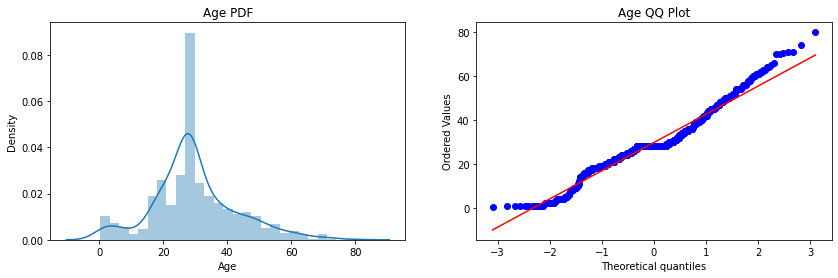

In [52]:
# plotting pdf and QQ-plot for age column
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

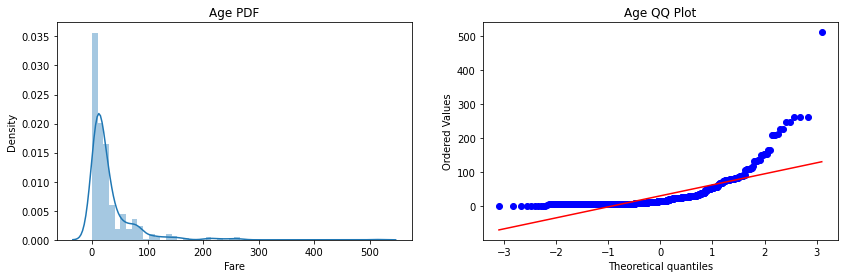

In [54]:
# plotting pdf and QQ-plot for fare column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

In [58]:
pipeline_regression = Pipeline(
    [
        (
            "Logestic Regression", LogisticRegression()
        )
    ]
)

pipeline_tree = Pipeline(
    [
        (
            "Decision Tree", DecisionTreeClassifier()
        )
    ]
)

In [59]:
pipeline_regression.fit(X_train,Y_train)

Pipeline(steps=[('Logestic Regression', LogisticRegression())])

In [60]:
pipeline_tree.fit(X_train,Y_train)

Pipeline(steps=[('Decision Tree', DecisionTreeClassifier())])

In [63]:
Y_pred_regression = pipeline_regression.predict(X_test)
Y_pred_classification = pipeline_tree.predict(X_test)

In [64]:
print(f"The accuracy of Logestic Regression without transformations is {accuracy_score(Y_test,Y_pred_regression)}")
print(f"The accuracy of Decision Tree without transformations is {accuracy_score(Y_test,Y_pred_regression)}")

The accuracy of Logestic Regression without transformations is 0.7094972067039106
The accuracy of Decision Tree without transformations is 0.7094972067039106
